# Spam filtering
> It exemplifies a widely spread family of tasks, `text classification`.
> A simple classification example:<br><br>
> 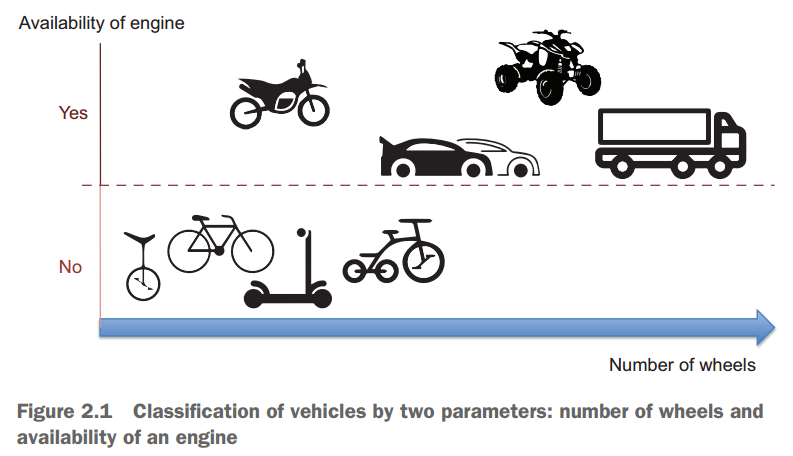
> Classification refers to the process of identifying which category or class among the
set of categories (classes) an observation belongs to based on its properties.
> >In machine learning, such `properties` are called `features` and the `class names` are
called `class labels`
> - When we are dealing with two labels only, it is called `binary classification`
> - Classification that implies more than two classes is called `multiclass classification`.<br>
> 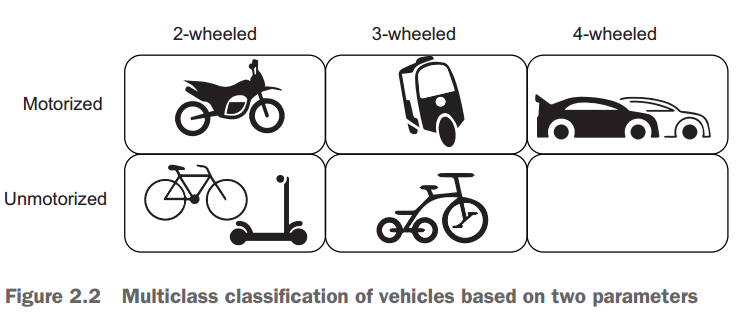

> Supervised machine learning:
>> Refers to a family of machine-learning tasks in which the algorithm learns the correspondences between an input and an output based on the
provided labeled examples.
>> >`Classification` is an example of a supervised machine-learning task, where the algorithm tries to learn the mapping between the input data
and the output class label.
>______________________________________
> Now that you know what classification is, lets get to the main topic:<br><br>
> 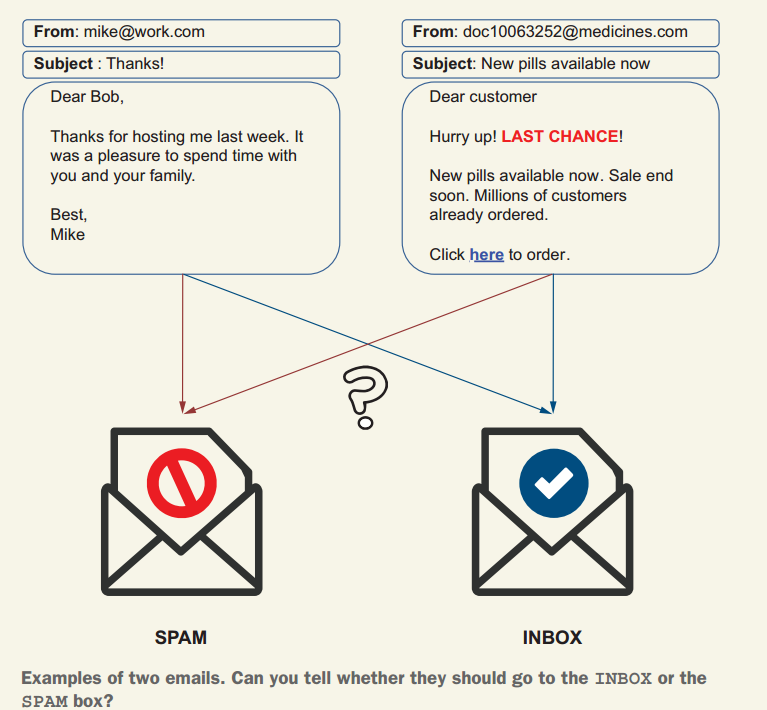

>___________________________
>  5 main steps in text classification:<br><br>
> 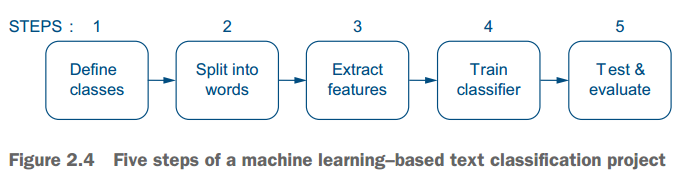

> ### Tokenization:
> > 1. The process of word token identification or extraction from the running text.
> > 2. It is often the first step in text preprocessing.
> > 3. Whitespaces and punctuation marks often serve as reliable word separators; however, simple approaches are likely
to run into exceptions like “U.S.A.” and similar.
>> 4. Tokenizers are NLP tools that are highly optimized for the task of word tokenization, and they may rely on carefully
crafted regular expressions or may be trained using machine-learning algorithms

> #### Here is the set of rules for spliting your data for test and train:
> 1. Shuffle your data to avoid any bias.
> 2. Split it randomly into a larger proportion for the training phase and set the rest aside for the test phase. The typical proportions for the sets are 80% for training and 20% for testing.
> 3. Train your classifier using the training set only.
> 4. Your test set is there to provide you with a realistic and fair estimate of your classifier’s performance, so
don’t let your classifier peek into it. Use it at the final step for `evaluation only`.<br><br>
> 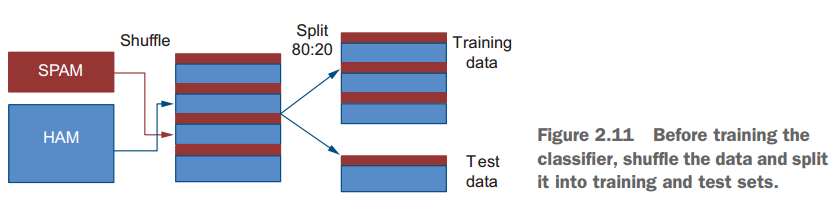

### Step 1:
> 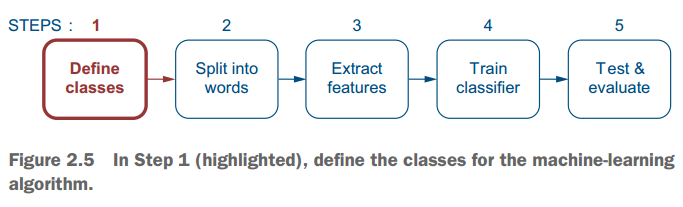

## Define the data and classes
> ### Enron Email Dataset:
>> This dataset was collected and prepared by the CALO Project (A Cognitive Assistant that Learns and Organizes). It contains data from about 150 users, mostly senior management of Enron, organized into folders. The corpus contains a total of about 0.5M messages. This data was originally made public, and posted to the web, by the Federal Energy Regulatory Commission during its investigation.
>> - more on the data: https://www.cs.cmu.edu/~enron/

In [1]:
# Import Python’s os module that  helps iterate through the folders.
import os
# Import Python’s codecs module that helps with different text encodings.
import codecs

def read_in(folder):
    # Using os functionality, list all the files in the specified folder.
    files = os.listdir(folder)
    a_list = []
    # Iterate through the files in the folder.
    for a_file in files:
        # skip hidden files
        if not a_file.startswith("."):
            # read the content of each file
            f = codecs.open(folder + a_file, "r", encoding = "ISO-8859-1", errors="ignore")
            # Add the content of each file to the list data structure
            a_list.append(f.read())
            # Close the file after you read its contents
            f.close()
    # return lists that contain the contents of the files from the specified folder.
    return a_list

In [2]:
# Initialize spam_list and ham_list.
spam_list = read_in("./data/enron1/spam/") 
ham_list = read_in("./data/enron1/ham/") 
# Check the lengths of the lists: for spam it should be 1,500 and for ham, 3,672.
print(len(spam_list)) 
print(len(ham_list)) 
# Print out the contents of the first entry (i.e., the first file in each correspondent subfolder).
print(spam_list[0])
print(ham_list[0]) 

1500
3672
Subject: dobmeos with hgh my energy level has gone up! Stukm
Introducing
Doctor - formulated
Hgh
Human growth hormone - also called hgh
Is referred to in medical science as the master hormone. It is very plentiful
When we are young, but near the age of twenty - one our bodies begin to produce
Less of it. By the time we are forty nearly everyone is deficient in hgh,
And at eighty our production has normally diminished at least 90 - 95%.
Advantages of hgh:
- increased muscle strength
- loss in body fat
- increased bone density
- lower blood pressure
- quickens wound healing
- reduces cellulite
- improved vision
- wrinkle disappearance
- increased skin thickness texture
- increased energy levels
- improved sleep and emotional stability
- improved memory and mental alertness
- increased sexual potency
- resistance to common illness
- strengthened heart muscle
- controlled cholesterol
- controlled mood swings
- new hair growth and color restore
Read
More at this website
Unsubscrib

### Step 2:
> 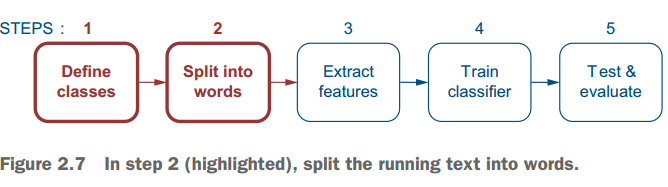

### Step 3:
> 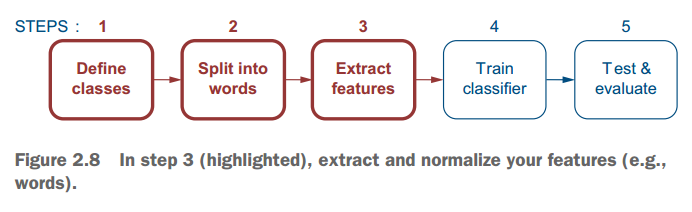

In [4]:
# Combine all emails together, keeping the label, and shuffle them:
# Python’s random module will help you shuffle the data randomly.
import random 
# Use list comprehensions to create the all_emails list that will keep all emails with their labels.
all_emails = [(email_content, "spam") for email_content in spam_list]
all_emails += [(email_content, "ham") for email_content in ham_list] 
# Select the seed of the random operator to make sure that all future runs will shuffle the data in the same way.
random.seed(42) 
random.shuffle(all_emails)
# Check the size of the dataset (length of the list); it should be equal to 1,500 + 3,672.
print (f"Dataset size = {str(len(all_emails))} emails")

Dataset size = 5172 emails


In [7]:
# Preprocess the texts by tokenising them and removing the stopwords:
import nltk
from nltk import word_tokenize

# Let’s define a function that will extract the features from the text input.
def get_features(text): 
    features = {}
    # Combine tokenization and converting strings to lowercase in one line using list comprehensions.
    word_list = [word for word in word_tokenize(text.lower())]
    for word in word_list:
        # For each word in the email, switch on the “flag” that this word is contained in the email.
        features[word] = True
    return features
# all_features will keep tuples containing the dictionary of features matched with the label for each email.
all_features = [(get_features(email), label) for (email, label) in all_emails]
# Check what features are extracted from an input text.
print(get_features("Participate In Our New Lottery NOW!"))

{'participate': True, 'in': True, 'our': True, 'new': True, 'lottery': True, 'now': True, '!': True}


> 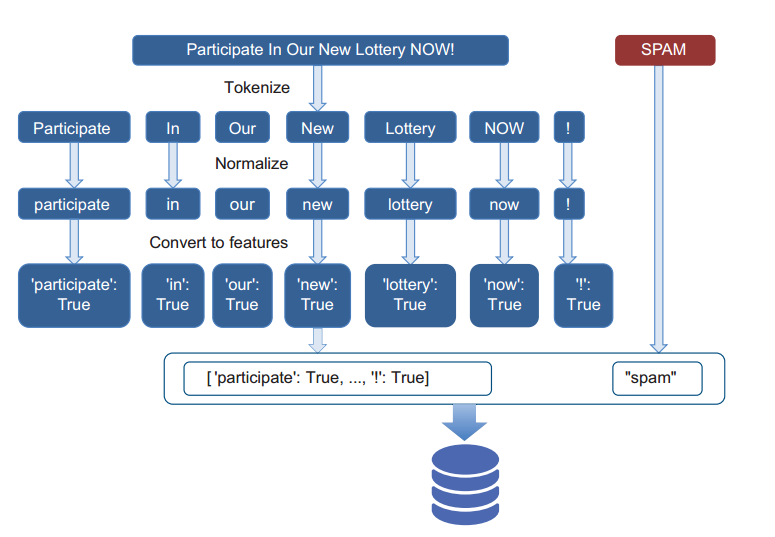

In [8]:
# Check what all_features list data structure contains.
print(len(all_features))
print(len(all_features[0][0]))
print(len(all_features[99][0]))

5172
27
53


>> 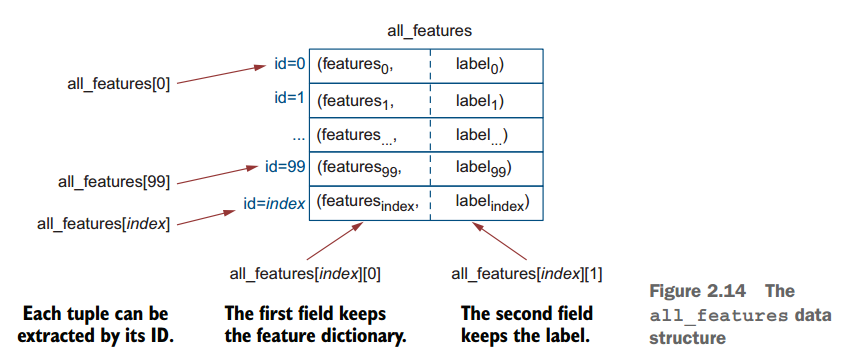

### Step 4:
> 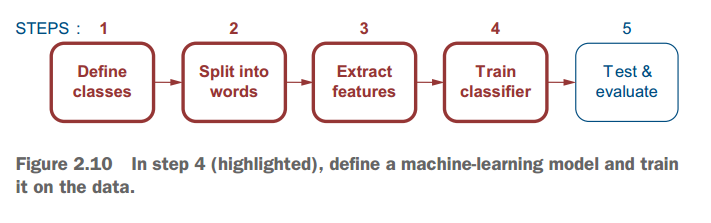

In [10]:
# Import the classifier implementation from NLTK.
from nltk import NaiveBayesClassifier, classify 
# Remember that you need to set aside part of the data for testing.
def train(features, proportion):
    train_size = int(len(features) * proportion) 
    train_set = features[:train_size]
    # Use the first n% of emails with their features for training and the rest for testing.
    test_set = features[train_size:]
    # Print out simple statistics to make sure the data is split correctly.
    print (f"Training set size = {str(len(train_set))} emails")
    print (f"Test set size = {str(len(test_set))} emails")
    # Initialize the classifier.
    classifier = NaiveBayesClassifier.train(train_set)
    
    return train_set, test_set, classifier
# Apply the train function using 80% (or a similar proportion) of emails for training.
train_set, test_set, classifier = train(all_features, 0.8) 

Training set size = 4137 emails
Test set size = 1035 emails


### Step 5:
> 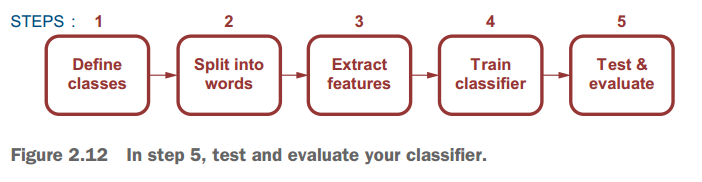

In [11]:
# Define a function to estimate the accuracy of the classifier on each set.
def evaluate(train_set, test_set, classifier): 
    print (f"Accuracy on the training set = {str(classify.accuracy(classifier, train_set))}")
    print (f"Accuracy of the test set = {str(classify.accuracy(classifier, test_set))}")
    classifier.show_most_informative_features(50) 
evaluate(train_set, test_set, classifier)

Accuracy on the training set = 0.9608411892675852
Accuracy of the test set = 0.9420289855072463
Most Informative Features
               forwarded = True              ham : spam   =    198.3 : 1.0
                    2004 = True             spam : ham    =    143.8 : 1.0
                     nom = True              ham : spam   =    126.0 : 1.0
            prescription = True             spam : ham    =    122.9 : 1.0
                    pain = True             spam : ham    =     98.8 : 1.0
                  health = True             spam : ham    =     82.7 : 1.0
                     ect = True              ham : spam   =     76.8 : 1.0
                    2001 = True              ham : spam   =     75.8 : 1.0
                featured = True             spam : ham    =     74.7 : 1.0
              nomination = True              ham : spam   =     72.1 : 1.0
             medications = True             spam : ham    =     69.9 : 1.0
                  differ = True             spam : ha

> 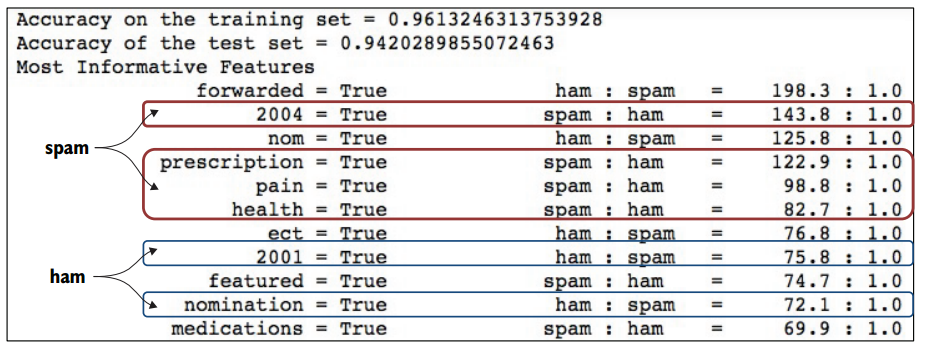

> - if you’d like to gain any further insight into how the words are used in the emails from different classes, you can also check the occurrences of any particular word in all available contexts. 

In [12]:
# Import NLTK’s Text data structure
from nltk.text import Text 
def concordance(data_list, search_word):
    for email in data_list:
        word_list = [word for word in word_tokenize(email.lower())]
        text_list = Text(word_list)
        if search_word in word_list:
            # Use NLTK’s concordancer to print out the search_word in context.
            text_list.concordance(search_word)
# Apply this function to ham_list and spam_list to search for contexts of “stocks.”
print("STOCKS in HAM:")
concordance(ham_list, "stocks")

print("\n\nSTOCKS in SPAM:")
concordance(spam_list, "stocks") 

STOCKS in HAM:
Displaying 1 of 1 matches:
ad my portfolio is diversified into stocks that have lost even more money than
Displaying 1 of 1 matches:
ur member directory . * follow your stocks and news headlines , exchange files
Displaying 1 of 1 matches:
ur member directory . * follow your stocks and news headlines , exchange files
Displaying 1 of 1 matches:
ur member directory . * follow your stocks and news headlines , exchange files


STOCKS in SPAM:
Displaying 2 of 2 matches:
ims and do your own due diligence . stocks to play ( s 2 p ) profiles are not 
s obtained . investing in micro cap stocks is extremely risky and , investors 
Displaying 1 of 1 matches:
cautions that small and micro - cap stocks are high - risk investments and tha
Displaying 1 of 1 matches:
s obtained . investing in micro cap stocks is extremely risky and , investors 
Displaying 3 of 3 matches:
ancements but may be one of the few stocks left in this industry group that is
his email pertaining to investing , stoc

- If you run this code and print out the contexts for stocks, you will find out that stocks
features in only four ham contexts (e.g., an email reminder “Follow your stocks and
news headlines”) as compared to hundreds of spam contexts including “Stocks to
play,” “Big money was made in these stocks,” “Select gold mining stocks,” “Little stocks
can mean big gains for you,” and so on

> ### Once you are happy with the results of your evaluation, you can deploy your classifier in practice.

In [13]:
test_spam_list = ["Participate in our new lottery!", "Try out this new medicine"]
test_ham_list = ["See the minutes from the last meeting attached", "Investors are coming to our office on Monday"]
# Read the emails extracting their textual content and keeping the labels for further evaluation.
test_emails = [(email_content, "spam") for email_content in test_spam_list]
test_emails += [(email_content, "ham") for email_content in test_ham_list] 
# Extract the features.
new_test_set = [(get_features(email), label) for (email, label) in test_emails]
# Apply the trained classifier and evaluate its performance.
evaluate(train_set, new_test_set, classifier)

Accuracy on the training set = 0.9608411892675852
Accuracy of the test set = 1.0
Most Informative Features
               forwarded = True              ham : spam   =    198.3 : 1.0
                    2004 = True             spam : ham    =    143.8 : 1.0
                     nom = True              ham : spam   =    126.0 : 1.0
            prescription = True             spam : ham    =    122.9 : 1.0
                    pain = True             spam : ham    =     98.8 : 1.0
                  health = True             spam : ham    =     82.7 : 1.0
                     ect = True              ham : spam   =     76.8 : 1.0
                    2001 = True              ham : spam   =     75.8 : 1.0
                featured = True             spam : ham    =     74.7 : 1.0
              nomination = True              ham : spam   =     72.1 : 1.0
             medications = True             spam : ham    =     69.9 : 1.0
                  differ = True             spam : ham    =     66.7

In [14]:
# For each email in each list, this code prints out the content of the email and the predicted label.
for email in test_spam_list:
    print (email)
    print (classifier.classify(get_features(email)))
for email in test_ham_list:
    print (email)
    print (classifier.classify(get_features(email))) 

Participate in our new lottery!
spam
Try out this new medicine
spam
See the minutes from the last meeting attached
ham
Investors are coming to our office on Monday
ham


# END of chapter 2 --> Spam text classification